# <span style="color: #204f78"><center><font size="6">Import de données</font></center></span>

<figure style="float: left;">
    <img src="https://github.com/ddhx-gh/1NSI/blob/b84a539e631f3a2be25bcb76a390c4b00fff8c06/logo2.png?raw=true" width="150">
</figure>


<BLOCKQUOTE style='background-color:#fff3ff;'>    

Objectifs : à l'issue de ce notebook, vous saurez :
- ce qu'est un fichier csv
- importer un fichier csv vers une liste de listes ou de dictionnaires
    
</BLOCKQUOTE>   

## <span style="color: #337dbd">Introduction</span>

Python est très utilisé dans le calcul scientifique et dans le traitement de données.

Une profession très en vogue, bien rémunérée et sans soucis d'embauche est le "data scientist" : son travail consiste à donner du sens à de gros volumes de données qu'il faut exploiter.

Avec l'[open-data](https://www.gouvernement.fr/action/l-ouverture-des-donnees-publiques) on trouve désormais énormément de données sur le net :
* [En France](https://www.data.gouv.fr/fr/)
* [Aux USA](https://www.data.gov/open-gov/)
* [Sur Reddit](https://www.reddit.com/r/dataisbeautiful/)
* [538](https://data.fivethirtyeight.com/)
* [Yelp](https://www.yelp.com/dataset/challenge)
* ...

De façon générale on peut chercher des "datasets" en anglais.

Les modules permettant "naturellement" de traiter des données et tableaux de valeurs en Python sont [numpy](https://numpy.org/) et [pandas](https://pandas.pydata.org/).


## <span style="color: #337dbd">Première partie : Le format csv</span>

Il existe un format "unifié" pour présenter les données : le __csv__ pour ___Comma Separated Value___.

Il s'agit de fichiers textes dans lesquels chaque ligne représente une entrée d'un tableau. Les différentes colonnes sont séparées par des virgules :

|Nom|Prénom|Classe|Note|
|---|------|------|----|
|Dupont|Jean|1e6|15|
|Marcelin|Astrid|1e4|17.5|

```
Nom,Prénom,Classe,Note
Dupont,Jean,1e6,15
Marcelin,Astrid,1e4,17.5
```

Dans la théorie c'est clair. Dans la réalité on rencontre :
* des fichiers séparés par des virgules, des point-virgules (en France en particulier), des tabulations (fichiers __tsv__)
* des encodages différents (utf8, utf8-sig, Latin1 ...)
* des fichiers où la première ligne contient les entêtes, d'autres non...
* des colonnes vides (du coup on a des ``,,`` dans le fichier)
* des colonnes sous format de chaînes de caractères, d'autres en nombres entiers, des flottants...
* des fichiers très petits, d'autres beaucoup trop [gros](https://www.imdb.com/interfaces/)...
* ...

Mais rassurez vous, nous allons travailler sur des fichiers csv que votre prof aura préparé en amont.

1. Allons voir le contenu d'un fichier csv : ouvrez le fichier nat2018.csv avec un éditeur de texte très simple type notepad. Vous pourrez constater que le séparateur utilisé ici est le ;

Le fichier ``nat2018.csv``. Ce fichier contient 4 colonnes :
* Le sexe du prénom
* Le prénom
* Une année (nombre entier)
* Le nombre d'enfants nés cette année et portant ce prénom (nombre entier)


Il est encodé au format ``utf-8-sig``.

2. Pour la suite de l'activité, il faut que le fichier notebook import_depuis_csv.ipynb et le fichier nat2018.csv soient dans un même dossier. Je vous conseille donc de créer un dossier themeC qui contient ces deux fichiers.
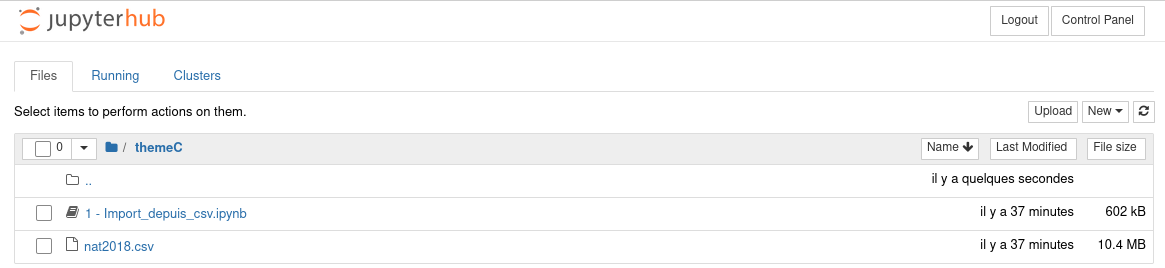

## <span style="color: #337dbd"> Deuxième partie : Import vers liste de listes </span>

La première approche pour importer un _csv_ en Python est de lire le fichier et de créer pour chaque ligne lue une valeur d'une liste.

Et, chaque valeur sera une liste en soit.

Par exemple pour le tableau des élèves suivant :

|Sexe|Prénom|Année|Nombre|
|---|------|------|----|
|M  |Abdon |1900|4|
|M  |Abel  |1900|428|

on a :

In [ ]:
prenoms = [["M", "Abdon", 1900 , 4], ["M", "Abel", 1900, 428]]

<BLOCKQUOTE style='background-color:#abd3d0;'>    

**NOTE :**
Remarquez qu'au passage nous avons perdu les entêtes (on aurait des données non homogènes sinon...)
</BLOCKQUOTE>   

On accède à la classe du 3ème élève en faisant :

In [ ]:
prenoms[1][3]

Pour l'import on doit donc :

        Créer un tableau vide qui contiendra nos données
        Ouvrir le fichier :
            Eventuellement lire la première ligne dans le vide (si elle contient les entêtes)
            Pour chaque ligne :
                La couper en valeurs selon le séparateur (virgule, point-virgule...)
                Créer une liste vide correspondant à cette entrée
                Ajouter les différentes valeurs à cette liste (en prenant soin de les convertir)
                Ajouter la liste au tableau général

On utilisera la fonction ``split`` pour couper la ligne en valeurs à chaque séparateur (par exemple ``ligne.split(",")``)

Importer ce fichier dans une liste de listes nommée ``prenoms`` :

In [ ]:
# Votre code
prenoms = []

with open("nat2018.csv", "r", encoding = "utf-8-sig") as fichier :
    fichier.readline()
    for ligne in fichier :
        valeurs = ligne.split(";")
        entree = []
        for i in range(len(valeurs)) :
            if i < 2 :
                entree.append(valeurs[i])
            else :
                entree.append(int(valeurs[i]))
        prenoms.append(entree)

prenoms

On peut désormais "interroger" le tableau pour en extraire du sens : c'est l'objet du chapitre C2 : Recherche dans une table. 

## <span style="color: #337dbd">Troisième partie : Pour information : Import vers une liste de dictionnaires avec la bibliothèque csv</span>

Python comporte dans la bibliothèque standart un module _csv_ qui permet d'importer rapidement des fichiers, en particulier vers des dictionnaires.

Fondamentalement, les fonctions de ce module font la même chsoe que le code précédent. 

In [ ]:
import csv

prenoms_dico2 = []

with open('nat2018.csv', "r", encoding="utf-8-sig") as fichier:
    reader = csv.DictReader(fichier, delimiter = ";")
    for ligne in reader:
         prenoms_dico2.append(ligne)

prenoms_dico2

Quelques remarques :
* Il faut tout de même préciser l'encodage et le délimiteur
* Par défaut on obtient pour chaque ligne des ``OrderedDict``, la différence avec les dictionnaires est pour nous négligeable
* Il faut quand même repasser afin de convertir les données chiffrées... :